# Solution

## Plot frequency response of USPAS CIC filter

In [5]:
%matplotlib inline
from numpy.polynomial import polynomial
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.which'] = "both"
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['grid.alpha'] = 0.5
plt.rcParams['font.size'] = 8

In [6]:
wave_samp_per = 5
cic_period = 23
R = cic_period * wave_samp_per 
M = 1 
N = 2
fs = 115e6  # Hz
num1 = np.zeros(R) 
num1[0] = 1 
num1[-1] = -1
npt = 4096

b = polynomial.polypow(num1, N) 
a = polynomial.polypow([1,-1], N) 
w, h = signal.freqz(b, a, worN=npt, fs=fs);

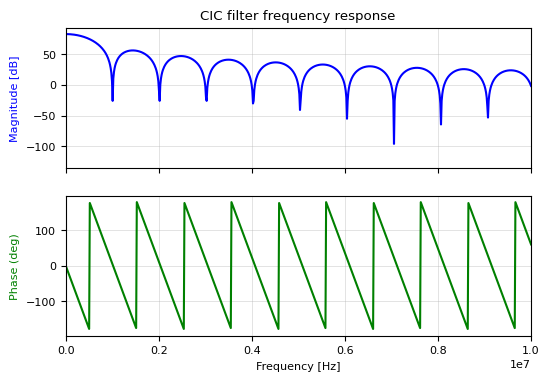

In [7]:
fig, ax = plt.subplots(2, sharex=True) 

w = w[1:]
h = h[1:]
phase = np.angle(h, deg=True)

ax[0].set_title('CIC filter frequency response') 
ax[0].plot(w, 20 * np.log10(abs(h)), 'b') 
ax[0].set_ylabel('Magnitude [dB]', color='b') 

ax[1].plot(w, phase, 'g') 
ax[1].set_ylabel('Phase (deg)', color='g') 
ax[-1].set_xlabel('Frequency [Hz]') 
ax[-1].set_xlim(0, 1e7);

> How much is the bit growth?

Total gain:
$$
G = (RM)^N
$$

Total bit growth:
$$
\log_2(G) = N \log_2(RM)
$$

In [4]:
N * np.log2(R * M)

13.69098010188875